In [54]:
import cv2
import logging as log
import numpy as np
import queue
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors
import os

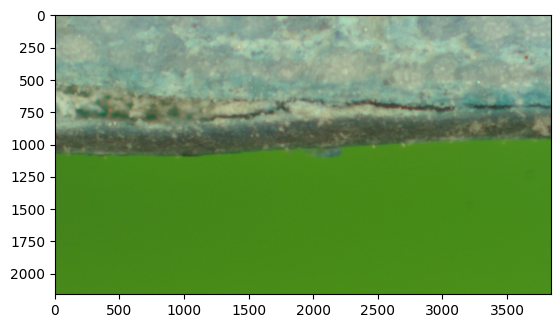

In [98]:
img_path = "test_images\\7\\frame_0_7_1.jpg"
img = cv2.imread(img_path)

plt.imshow(img)

In [96]:
dir = "test_images\\7"
image_files = os.listdir(dir)
print(image_files)
focusimages = []

for img in image_files:
    read_img = cv2.imread("{}\{}".format(dir, img))             
    focusimages.append(read_img)

['best.jpg', 'frame_0_7_0.jpg', 'frame_0_7_1.jpg', 'frame_0_7_2.jpg', 'frame_0_7_3.jpg', 'frame_0_7_4.jpg', 'frame_0_7_5.jpg', 'frame_0_7_6.jpg']


In [99]:
imgHSV = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# h, s, v = cv2.split(imgHSV)
# fig = plt.figure()
# axis = fig.add_subplot(1, 1, 1, projection="3d")

# pixel_colors = img.reshape((np.shape(img)[0]*np.shape(img)[1], 3))
# norm = colors.Normalize(vmin=-1.,vmax=1.)
# norm.autoscale(pixel_colors)
# pixel_colors = norm(pixel_colors).tolist()

# axis.scatter(h.flatten(), s.flatten(), v.flatten(), facecolors=pixel_colors, marker=".")
# axis.set_xlabel("Hue")
# axis.set_ylabel("Saturation")
# axis.set_zlabel("Value")
# plt.show()

lower_green = np.array([81,100,46])
upper_green = np.array([85,150,50])
h_channel = imgHSV[:,:,1]
mask = cv2.inRange(h_channel, 100, 150)
# mask = cv2.inRange(imgHSV, np.array([0,250,0]), np.array([255,255,255]))
res =cv2.bitwise_and(img,img, mask=mask)
# plt.imshow(res)

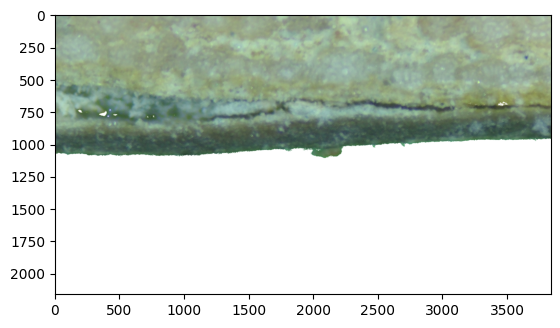

In [100]:
imgRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
imgHSV = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)


lower_green = np.array([81,100,46])
upper_green = np.array([85,150,50])
s_channel = imgHSV[:,:,1]
mask = cv2.inRange(s_channel, 0, 130)
# mask = cv2.inRange(imgHSV, np.array([0,250,0]), np.array([255,255,255]))
res =np.dstack((imgRGB, mask))

plt.imshow(res)
plt.show()


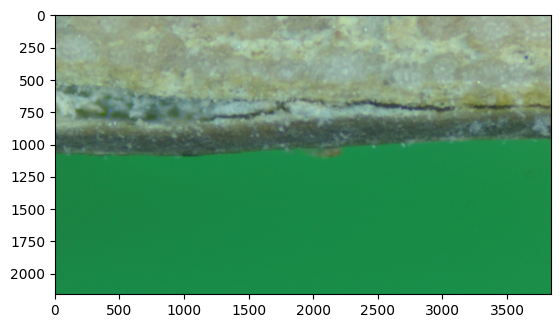

In [101]:
plt.imshow(imgRGB)

In [104]:
kernel_size =11         # Size of the laplacian window
blur_size = 9           # How big of a kernel to use for the gaussian blur

blurred = cv2.GaussianBlur(res, (blur_size,blur_size), 0)
lap = cv2.Laplacian(blurred, cv2.CV_64F, ksize=kernel_size) 

lap.var()


9291894703.144781

In [85]:
def hsl_mask(img):
    imgHSV = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    imgRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


    s_channel = imgHSV[:,:,1]
    mask = cv2.inRange(s_channel, 0, 150)
    # mask = cv2.inRange(imgHSV, np.array([0,250,0]), np.array([255,255,255]))
    res =np.dstack((imgRGB, mask))

    return res


def compute_laplacian(image):

    # odd numbers only, can be tuned
    kernel_size = 11         # Size of the laplacian window
    blur_size = 9           # How big of a kernel to use for the gaussian blur

    blurred = cv2.GaussianBlur(image, (blur_size,blur_size), 0)
    return cv2.Laplacian(blurred, cv2.CV_64F, ksize=kernel_size) 

In [86]:
def best_focused_image(images):
    best_image = []
    best_lap = 0.0

    for image in images:
        masked_image = hsl_mask(image)
        lap = compute_laplacian(masked_image)
        print(lap.var())
        if lap.var() > best_lap:
            best_lap = lap.var()
            best_image = image

    return best_image

9726017268.897049
7373698782.07541
8384221379.738061
7465902163.94738
9938473675.870825
8329240148.327728
6475247217.908725
7711559170.436587


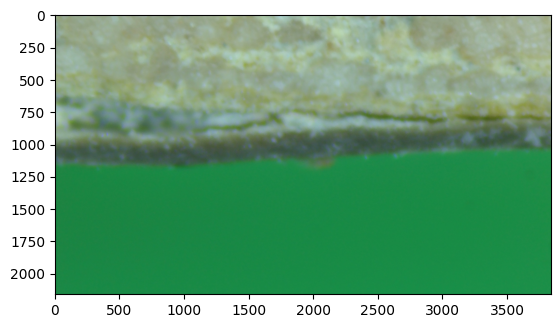

In [89]:
res = best_focused_image(focusimages)

resRGB = cv2.cvtColor(res, cv2.COLOR_BGR2RGB)
plt.imshow(resRGB)